In [14]:
import math
import matplotlib.pyplot as plt
import numpy as np

<h2>Cálculo dos parâmetros do transformador<h2>

In [15]:
# Teste em vazio

Vo = 230
Io = 108
Po = 5000

# Teste em curto circuito

Vcc = 13.75
Icc = 217.39
Pcc = 954.2

# Outros parametros

alpha = 10
fp = 0.92

<h5>Espressões para Rc e Xm:

In [16]:
Rc = math.pow(Vo, 2)/Po
Ic = Vo/Rc
Im = math.sqrt(math.pow(Io, 2) - math.pow(Ic, 2))
Xm = Vo/Im

print("Rc = ", Rc)
print("Xm = ", Xm)

Rc =  10.58
Xm =  2.174129599413981


<h5>Expressões para R1, X1, R2 e X2

In [17]:
Req = Pcc/math.pow(Icc, 2)
Zeq = Vcc/Icc
Xeq = math.sqrt(math.pow(Zeq, 2) + math.pow(Req, 2))

R1 = Req/2
R2 = Req/(2*math.pow(alpha, 2))
X1 = Xeq/2
X2 = Xeq/(2*math.pow(alpha, 2))

print("R1 = ", 1000*R1, "m Ohm")
print("X1 = ", 1000*X1, "m Ohm")
print("R2 = ",  1000000*R2, "u Ohm")
print("X2 = ",  1000000*X2, "u Ohm")

R1 =  10.095557146322317 m Ohm
X1 =  33.197483351756894 m Ohm
R2 =  100.95557146322317 u Ohm
X2 =  331.9748335175689 u Ohm


<h2>Cálculo do rendimento do trafo<h2>

<h5> Calculando a variação de V2 e E1 com a variação da carga

In [21]:
Inom = Icc
V1 = Vo

I2 = np.linspace(0.1*Inom, Inom, 10)
E1 = abs(V1*np.ones(10) - alpha*I2*(R1 + X1*1j))
V2 = abs(alpha*V1*np.ones(10) - (alpha**2*(R1 + X1*1j) + (R2 + X2*1j))*I2)

<h5> Calculando as perdas

In [22]:
Pc = E1**2/Rc
Pcu = abs(I2**2*(R1/(alpha**2) + X1*1j/(alpha**2) + R2 + X2*1j))
Psaida = V2*I2*fp

<h5> Por fim, calculamos o rendimento

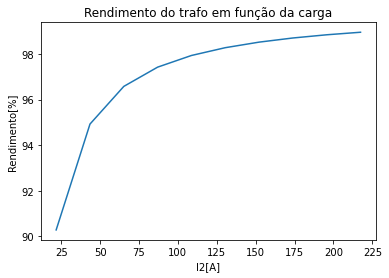

In [23]:
eta = Psaida/(Pc + Pcu + Psaida)*100

plt.plot(I2, eta)
plt.title("Rendimento do trafo em função da carga")
plt.xlabel("I2[A]")
plt.ylabel("Rendimento[%]")
plt.show()